In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 导入旅游人数数据

In [61]:
# 旅游人数数据提取
tourism_data = {
    "Year": [
        2014, 2015, 2016, 2017, 2018, 2019, 
        2020, 2021, 2022, 2023, 2024, 2025, 
        2026, 2027, 2028
    ],
    "Tourism Numbers": [
        9.61e5, 9.83e5, 1.015e6, 1.072e6, 1.151e6, 1.306e6,
        1.259667e6, 1.213333e6, 1.167e6, 1.67e6, 1.701018e6, 
        1.773778e6, 1.841641e6, 1.909127e6, 1.975809e6
    ]
}

# 转换为 Pandas DataFrame
import pandas as pd

tourism_df = pd.DataFrame(tourism_data)

# 查看提取后的数据
print(tourism_df)

    Year  Tourism Numbers
0   2014         961000.0
1   2015         983000.0
2   2016        1015000.0
3   2017        1072000.0
4   2018        1151000.0
5   2019        1306000.0
6   2020        1259667.0
7   2021        1213333.0
8   2022        1167000.0
9   2023        1670000.0
10  2024        1701018.0
11  2025        1773778.0
12  2026        1841641.0
13  2027        1909127.0
14  2028        1975809.0


### 导入满意度数据

In [62]:
# 数据提取
stsfy_trend_data = {
    "Year": [2021, 2022, 2023],
    "Pos": [36, 35, 31],
    "Neg": [8, 7, 11],
    "Both": [33, 41, 46],
    "No": [20, 16, 11],
    "Don’t know": [2, 1, 0]
}

# 转换为 Pandas DataFrame
stsfy_data_df = pd.DataFrame(stsfy_trend_data)

# 为每种选择赋分数并计算每年的总分
weights = {
    "Pos": 4,
    "Neg": -3,
    "Both": 1,
    "No": 0,
    "Don’t know": 0
}

stsfy_data_df["Score"] = (
    stsfy_data_df["Pos"] * weights["Pos"] +
    stsfy_data_df["Neg"] * weights["Neg"] +
    stsfy_data_df["Both"] * weights["Both"] +
    stsfy_data_df["No"] * weights["No"] +
    stsfy_data_df["Don’t know"] * weights["Don’t know"]
)

print(stsfy_data_df)

   Year  Pos  Neg  Both  No  Don’t know  Score
0  2021   36    8    33  20           2    153
1  2022   35    7    41  16           1    160
2  2023   31   11    46  11           0    137


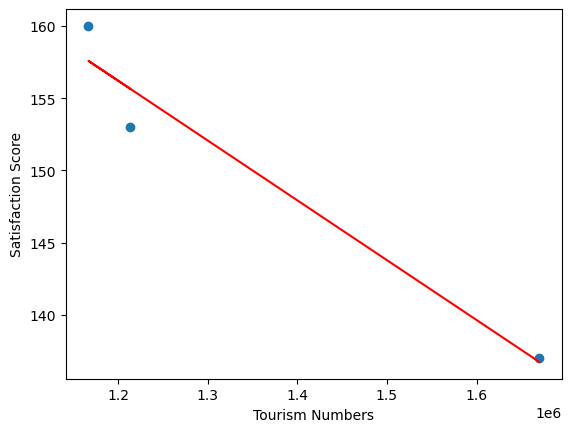

C:\Users\19912\AppData\Local\Temp\ipykernel_1836\3813580278.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_years["Score"] = model.predict(other_years["Tourism Numbers"].values.reshape(-1, 1))


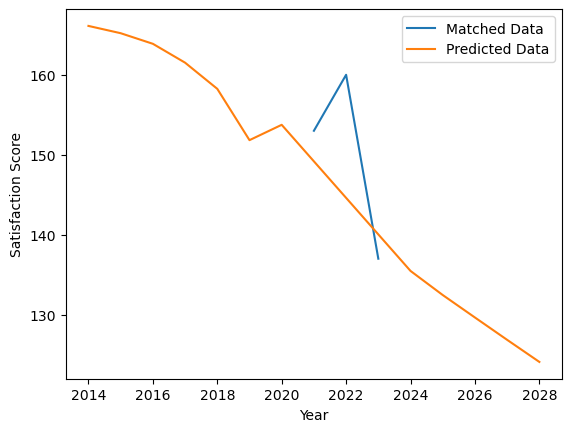

In [63]:
from sklearn.linear_model import LinearRegression
# 提取匹配年份的旅游人数和评分数据
matched_data = pd.merge(
    tourism_df,
    stsfy_data_df[["Year", "Score"]],
    on="Year"
)

# 线性拟合
x = matched_data["Tourism Numbers"]
y = matched_data["Score"]

model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

# 画图
plt.scatter(x, y)
plt.plot(x, model.predict(x.values.reshape(-1, 1)), color="red")
plt.xlabel("Tourism Numbers")
plt.ylabel("Satisfaction Score")

# 显示图像
plt.show()

# 清空图像
plt.clf()

# 把其他年份的旅游人数数据提取出来，带入线性模型计算满意度分数
other_years = tourism_df[~tourism_df["Year"].isin(stsfy_data_df["Year"])]
other_years["Score"] = model.predict(other_years["Tourism Numbers"].values.reshape(-1, 1))

# 按照年份画图
plt.plot(matched_data["Year"], matched_data["Score"], label="Matched Data")
plt.plot(other_years["Year"], other_years["Score"], label="Predicted Data")
plt.xlabel("Year")
plt.ylabel("Satisfaction Score")
plt.legend()

# 显示图像

plt.show()

### 导入拥挤、空气污染等居民抱怨程度数据

In [64]:
# 数据提取
trend_data = {
    "Category": [
        "Crowding at Mendenhall Glacier",
        "Crowding on sidewalks downtown",
        "Vehicle congestion downtown",
        "Flightseeing noise",
        "Air emissions from cruise ships",
        "Vehicle congestion outside of downtown",
        "Whale watching boat traffic and wakes",
        "Crowding on trails"
    ],
    "2021": [57, 57, 57, 41, 36, 36, 41, 34],
    "2022": [57, 56, 51, 46, 42, 42, 40, 38],
    "2023": [63, 59, 61, 43, 36, 45, 47, 40]
}

# 转换为 Pandas DataFrame
import pandas as pd

data_df = pd.DataFrame(trend_data)

# 查看提取后的数据
print(data_df)


                                 Category  2021  2022  2023
0          Crowding at Mendenhall Glacier    57    57    63
1          Crowding on sidewalks downtown    57    56    59
2             Vehicle congestion downtown    57    51    61
3                      Flightseeing noise    41    46    43
4         Air emissions from cruise ships    36    42    36
5  Vehicle congestion outside of downtown    36    42    45
6   Whale watching boat traffic and wakes    41    40    47
7                      Crowding on trails    34    38    40


### 线性拟合结果

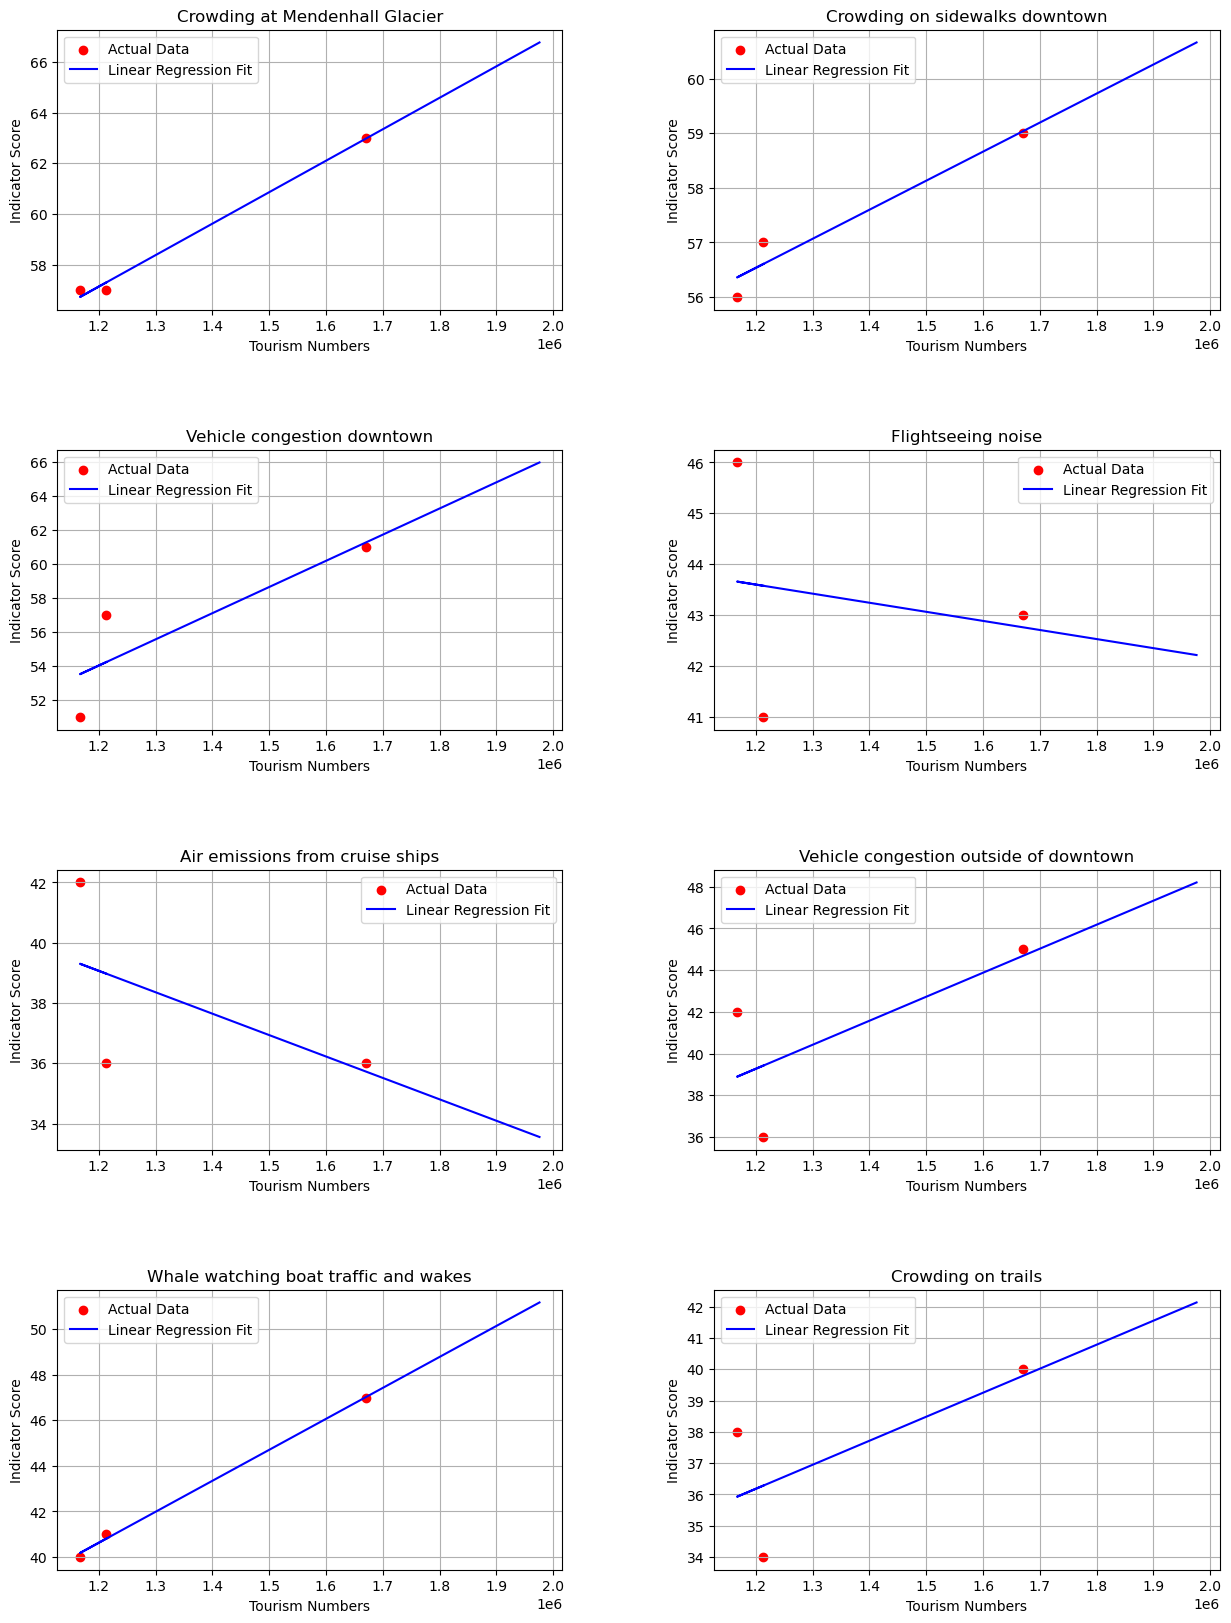

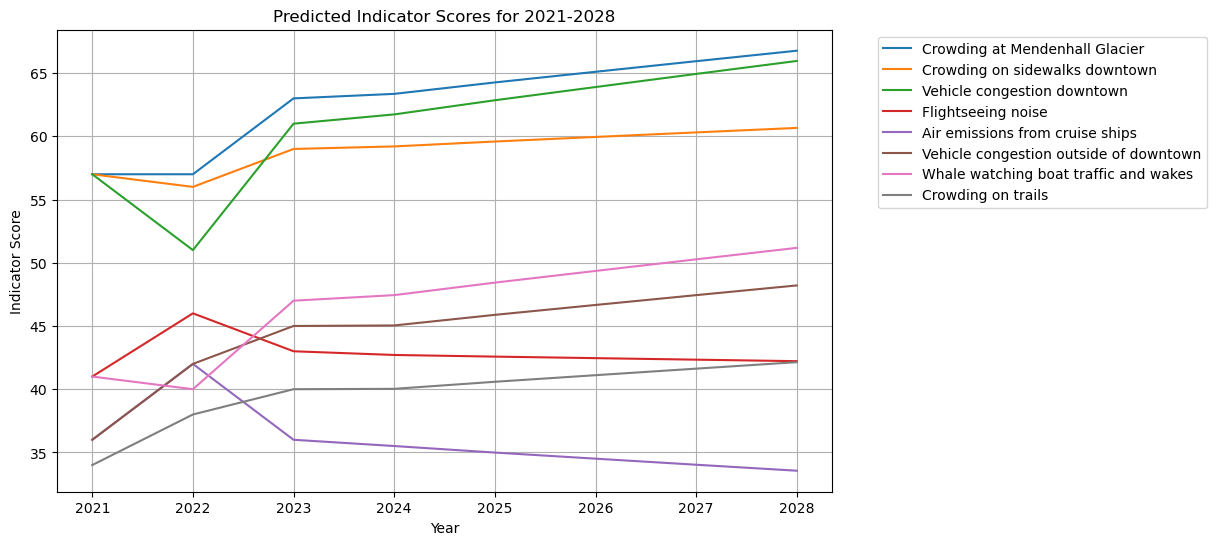

In [65]:
data_df_melted = data_df.melt(id_vars=['Category'], var_name='Year', value_name='Score')
data_df_melted['Year'] = data_df_melted['Year'].astype(int)

# Merge tourism numbers and indicator data (2021-2023)
merged_tourism_df = tourism_df[tourism_df['Year'].isin([2021, 2022, 2023])].copy()
merged_data_df = merged_tourism_df[['Year', 'Tourism Numbers']].merge(
    data_df_melted,
    on='Year'
)

# Predict for future years
future_years = [2024, 2025, 2026, 2027, 2028]
future_tourism_numbers = tourism_df[tourism_df['Year'].isin(future_years)]['Tourism Numbers'].values

# Linear fitting and prediction
categories = data_df['Category'].unique()
prediction_results = {}

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for the current category
    category_data = merged_data_df[merged_data_df['Category'] == category]
    X = category_data['Tourism Numbers'].values.reshape(-1, 1)  # Tourism numbers as independent variable
    y = category_data['Score'].values  # Indicator scores as dependent variable

    # Create linear regression model
    lr_model = LinearRegression()
    lr_model.fit(X, y)

    # # Predict future indicator values
    future_predictions = lr_model.predict(future_tourism_numbers.reshape(-1, 1))
    prediction_results[category] = np.concatenate([y, future_predictions])

    # Visualize results
    all_tourism_numbers = np.concatenate([X.flatten(), future_tourism_numbers])
    axes[i].scatter(X, y, color='red', label='Actual Data')
    axes[i].plot(all_tourism_numbers, lr_model.predict(all_tourism_numbers.reshape(-1, 1)), color='blue', label='Linear Regression Fit')
    axes[i].set_title(f'{category}')
    axes[i].set_xlabel('Tourism Numbers')
    axes[i].set_ylabel('Indicator Score')
    axes[i].legend()
    axes[i].grid()

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

# Summary of prediction results
future_years_with_data = [2021, 2022, 2023] + future_years
predicted_df = pd.DataFrame(prediction_results, index=future_years_with_data)
predicted_df.index.name = 'Year'
# print("Prediction Results:")
# print(predicted_df)

# 画图
plt.figure(figsize=(10, 6))
for category in categories:
    plt.plot(predicted_df.index, predicted_df[category], label=category)
    
plt.xlabel("Year")
plt.ylabel("Indicator Score")
plt.title("Predicted Indicator Scores for 2021-2028")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

### 导入基础设施支出数据

In [66]:
# 数据提取
public_expenditure = {
    "Category": [
        "Street Services",
        "Wastewater",
        "Public Transit",
        "Parks and Recreation",
        "Docks",
        "Ports"
    ],
    "2023": [
        5960200, 19733700,  # Street Services 和 Wastewater
        6715300,            # Public Transit
        13896900,           # Parks and Recreation
        2341500, 5158600    # Docks 和 Ports
    ],
    "2024": [
        6953800, 14535800,  # Street Services 和 Wastewater
        7437700,            # Public Transit
        14811900,           # Parks and Recreation
        2728300, 5191400    # Docks 和 Ports
    ],
    "2025": [
        6990400, 16927700,  # Street Services 和 Wastewater
        9138100,            # Public Transit
        18270600,           # Parks and Recreation
        2845900, 7375200    # Docks 和 Ports
    ],
    "2026": [
        7255800, 17346400,  # Street Services 和 Wastewater
        9194400,            # Public Transit
        18351600,           # Parks and Recreation
        2889200, 5463800    # Docks 和 Ports
    ]
}

# 转换为 Pandas DataFrame
import pandas as pd

data_df = pd.DataFrame(public_expenditure)

# 查看提取后的数据
print(data_df)


               Category      2023      2024      2025      2026
0       Street Services   5960200   6953800   6990400   7255800
1            Wastewater  19733700  14535800  16927700  17346400
2        Public Transit   6715300   7437700   9138100   9194400
3  Parks and Recreation  13896900  14811900  18270600  18351600
4                 Docks   2341500   2728300   2845900   2889200
5                 Ports   5158600   5191400   7375200   5463800


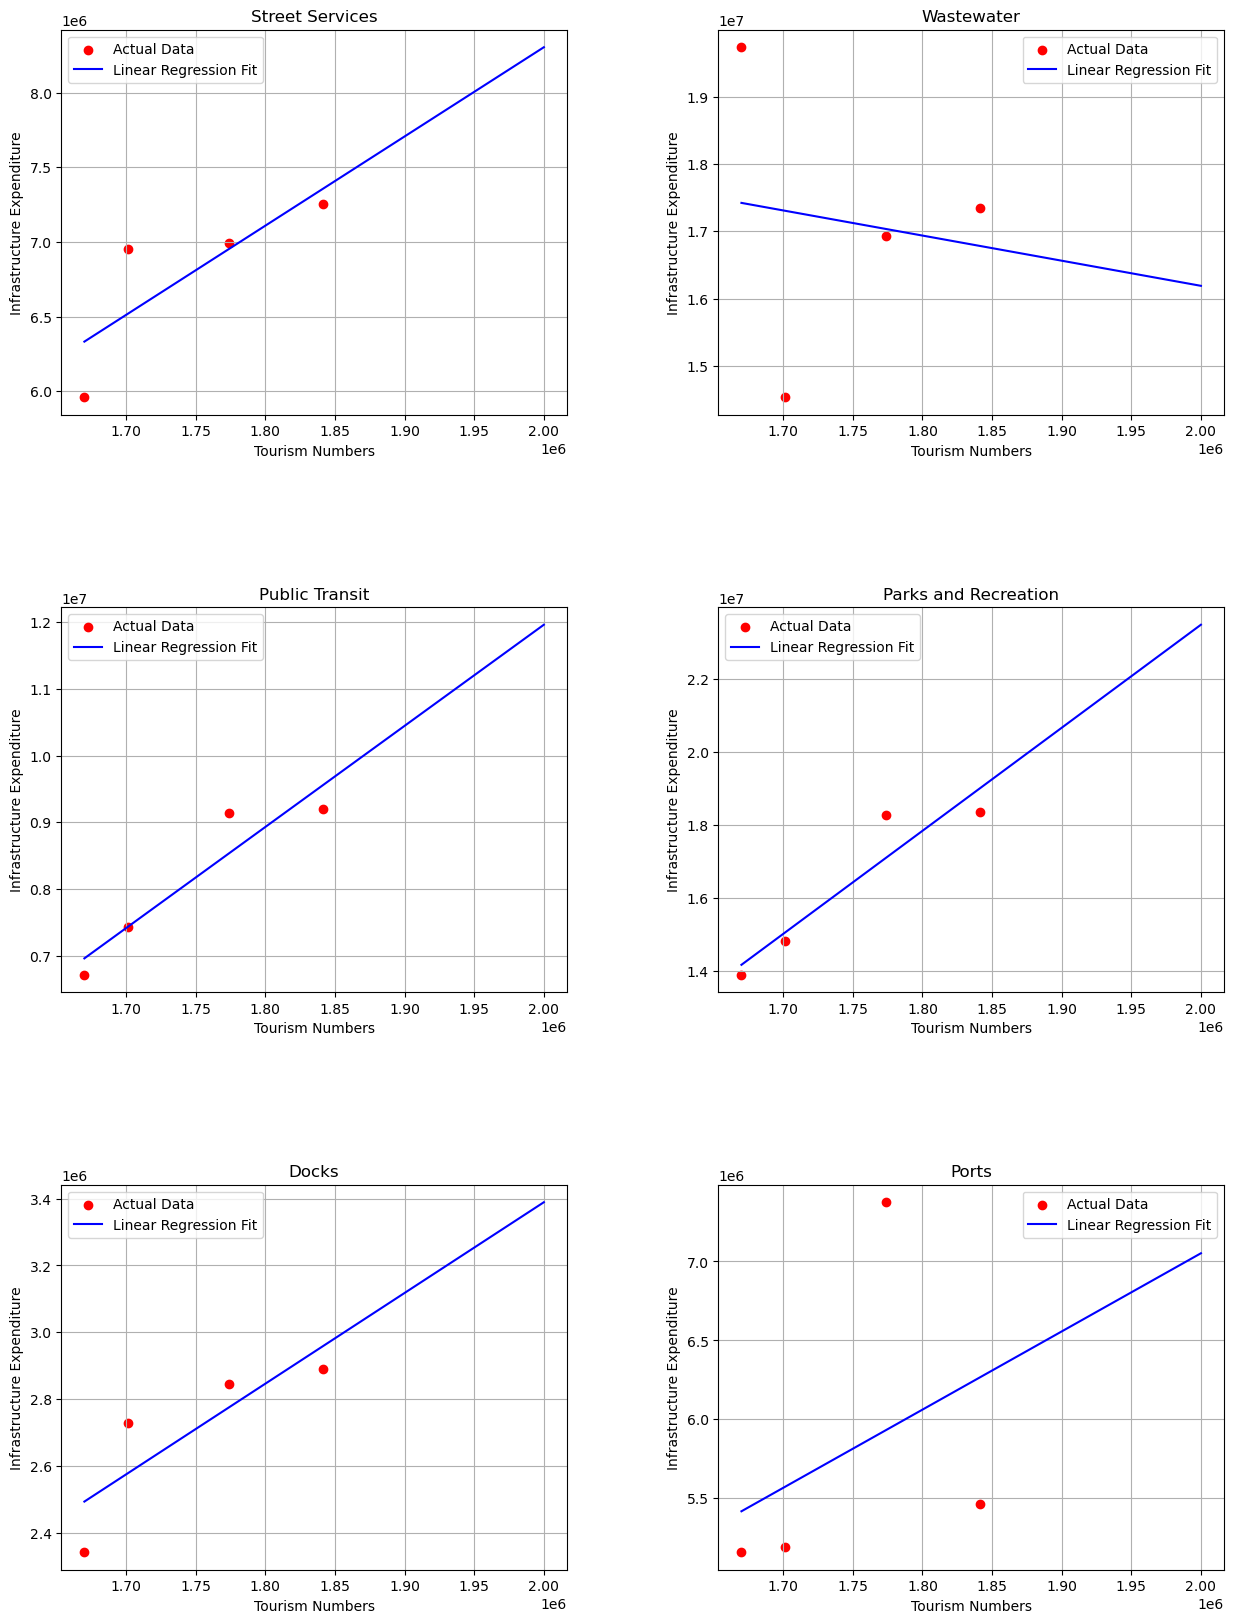

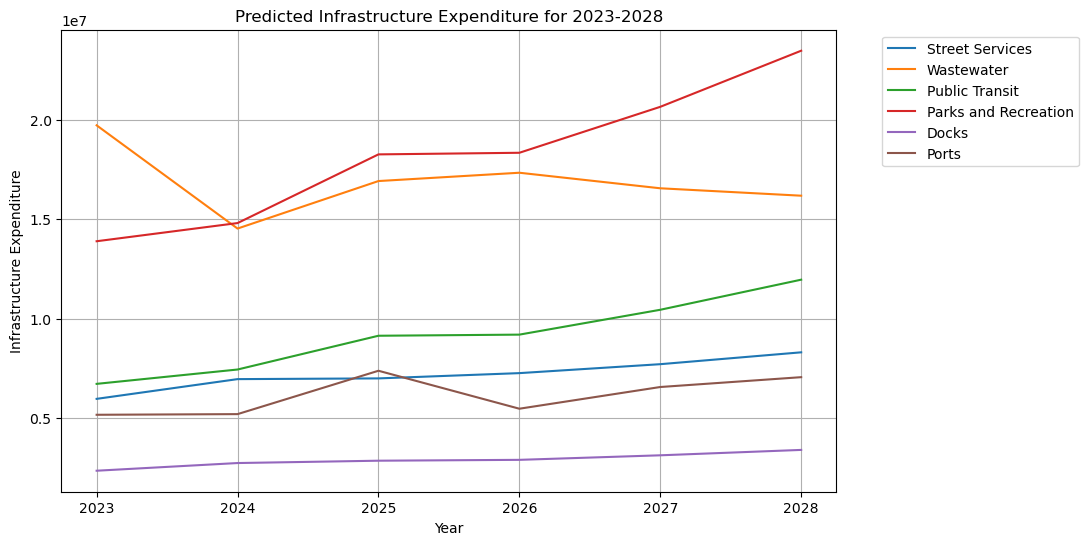

In [67]:
# Convert to DataFrame
expenditure_df = pd.DataFrame(public_expenditure)
expenditure_df = expenditure_df.melt(id_vars=['Category'], var_name='Year', value_name='Expenditure')
expenditure_df['Year'] = expenditure_df['Year'].astype(int)

# Merge tourism numbers and infrastructure expenditure data
merged_data_df = expenditure_df.merge(
    tourism_df,
    on='Year'
)

# Linear fitting for each category
categories = expenditure_df['Category'].unique()
prediction_results = {}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for the current category
    category_data = merged_data_df[merged_data_df['Category'] == category]
    X = category_data['Tourism Numbers'].values.reshape(-1, 1)  # Tourism numbers as independent variable
    y = category_data['Expenditure'].values  # Infrastructure expenditure as dependent variable

    # Create linear regression model
    lr_model = LinearRegression()
    lr_model.fit(X, y)

    # Predict
    future_tourism_numbers = np.array([1.9e6, 2.0e6]).reshape(-1, 1)  # Future predicted tourism numbers
    future_predictions = lr_model.predict(future_tourism_numbers)
    prediction_results[category] = np.concatenate([y, future_predictions])

    # Visualize results
    all_tourism_numbers = np.concatenate([X.flatten(), future_tourism_numbers.flatten()])
    axes[i].scatter(X, y, color='red', label='Actual Data')
    axes[i].plot(all_tourism_numbers, lr_model.predict(all_tourism_numbers.reshape(-1, 1)), color='blue', label='Linear Regression Fit')
    axes[i].set_title(f'{category}')
    axes[i].set_xlabel('Tourism Numbers')
    axes[i].set_ylabel('Infrastructure Expenditure')
    axes[i].legend()
    axes[i].grid()

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

# Summary of prediction results
future_years = [2027, 2028]
future_years_with_data = [2023, 2024, 2025, 2026] + future_years
predicted_df = pd.DataFrame(prediction_results, index=future_years_with_data)
predicted_df.index.name = 'Year'
# print("Prediction Results:")
# print(predicted_df)

# 画图
plt.figure(figsize=(10, 6))
for category in categories:
    plt.plot(predicted_df.index, predicted_df[category], label=category)
    
plt.xlabel("Year")
plt.ylabel("Infrastructure Expenditure")
plt.title("Predicted Infrastructure Expenditure for 2023-2028")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


### 导入居民生活支出

In [69]:
# 定义数据 lv = living
lv_data = {
    "Year": [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "JNU Composite": [139.8, 132.2, 132.4, 130.6, 129.9, 133.5, 134.0, 133.2, 130.0, 129.1, 127.9, 128.0],
    "Grocery Items": [133.2, 119.0, 129.3, 127.0, 134.1, 144.0, 136.5, 146.9, 136.6, 143.1, 136.3, 122.7],
    "JNU Housing": [171.0, 160.8, 158.8, 151.0, 146.2, 150.5, 151.2, 149.9, 148.4, 141.9, 142.3, 131.7],
    "Utilities": [167.9, 158.4, 145.5, 134.8, 125.7, 120.7, 133.8, 131.4, 138.2, 136.1, 133.0, 139.2],
    "Transportation": [113.9, 112.9, 108.7, 130.7, 134.8, 128.3, 129.9, 132.9, 125.9, 112.8, 115.3, 124.9],
    "Healthcare": [146.7, 153.0, 150.2, 149.3, 149.4, 156.2, 153.2, 152.2, 153.0, 155.6, 153.7, 151.4],
    "Misc. Good and Services": [116.2, 111.5, 112.8, 110.8, 113.1, 117.6, 113.4, 113.1, 108.6, 105.5, 110.2, 122.1]
}

# 创建DataFrame
lv_df = pd.DataFrame(lv_data)

# 打印DataFrame
# print(lv_df)

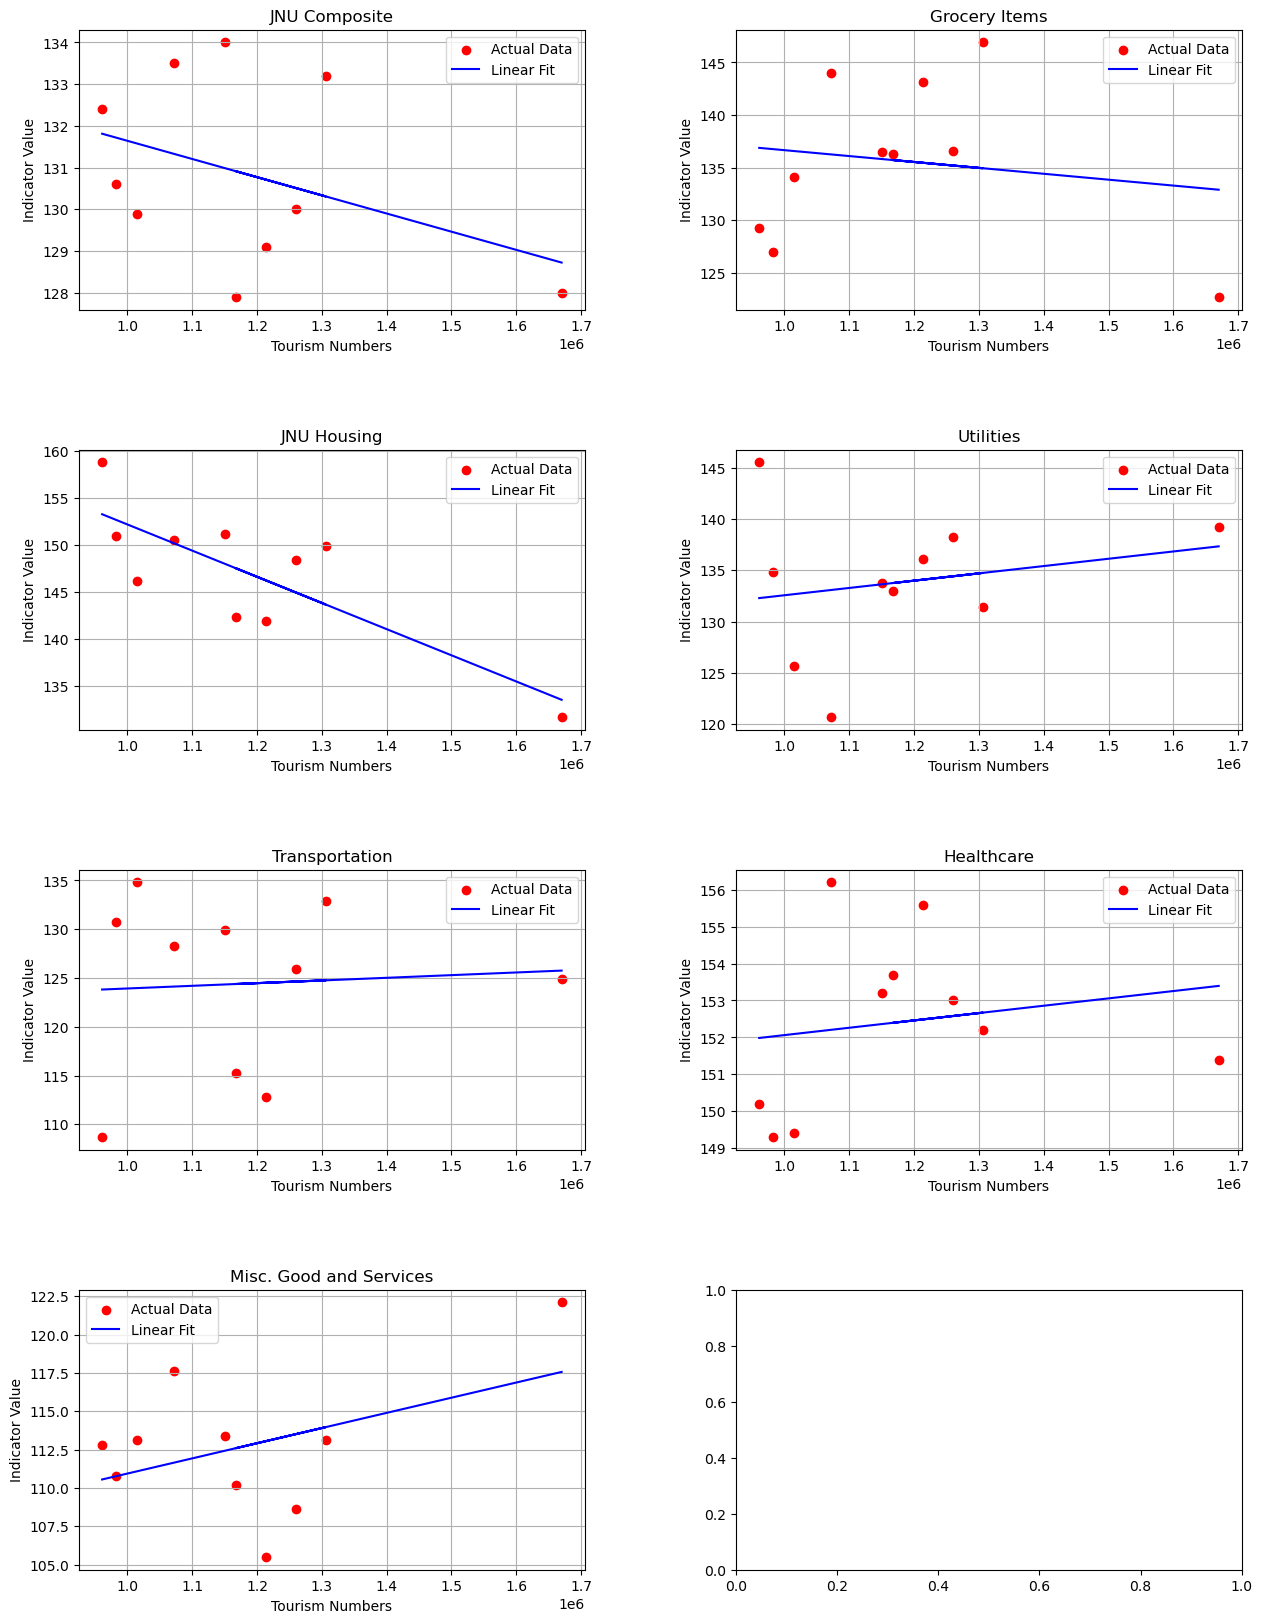

Linear Regression Coefficients (Slope, Intercept):
JNU Composite: Slope = -0.0000, Intercept = 135.9986
Grocery Items: Slope = -0.0000, Intercept = 142.2686
JNU Housing: Slope = -0.0000, Intercept = 180.0602
Utilities: Slope = 0.0000, Intercept = 125.4527
Transportation: Slope = 0.0000, Intercept = 121.1910
Healthcare: Slope = 0.0000, Intercept = 150.0722
Misc. Good and Services: Slope = 0.0000, Intercept = 101.0485


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 数据整理：筛选匹配的年份
merged_years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
merged_tourism_df = tourism_df[tourism_df['Year'].isin(merged_years)].copy()
merged_lv_df = lv_df[lv_df['Year'].isin(merged_years)].copy()

# 合并数据
merged_data = pd.merge(
    merged_tourism_df,
    merged_lv_df,
    on='Year'
)

# 提取独立变量（X）和因变量（Y）
X = merged_data['Tourism Numbers'].values.reshape(-1, 1)
categories = lv_df.columns[1:]  # 排除 "Year"，剩下的是指标列

# 结果存储和绘图
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

coefficients = {}
for i, category in enumerate(categories):
    y = merged_data[category].values  # 当前指标数据

    # 线性回归
    lr_model = LinearRegression()
    lr_model.fit(X, y)
    
    # 存储线性回归系数
    coefficients[category] = (lr_model.coef_[0], lr_model.intercept_)

    # 可视化
    axes[i].scatter(X, y, color='red', label='Actual Data')
    axes[i].plot(X, lr_model.predict(X), color='blue', label='Linear Fit')
    axes[i].set_title(f'{category}')
    axes[i].set_xlabel('Tourism Numbers')
    axes[i].set_ylabel('Indicator Value')
    axes[i].legend()
    axes[i].grid()

# 调整子图布局
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

# 打印结果
print("Linear Regression Coefficients (Slope, Intercept):")
for category, (slope, intercept) in coefficients.items():
    print(f"{category}: Slope = {slope:.4f}, Intercept = {intercept:.4f}")
